In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [13]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']


def E( XY, g):
    x_set, y_set, f_XY =  XY
    return np.sum ([ g(x_i, y_j) * f_XY(x_i, y_j) 
                    for x_i in x_set for y_j in y_set ])
    

def Cov( XY):
    x_set, y_set, f_XY =  XY
    mean_X = E( XY, lambda x, y:x )
    mean_Y = E( XY, lambda x, y:y )
    return np.sum ([ (x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) 
                    for x_i in x_set for y_j in y_set ])
    

def f_X(x):
    return np.sum([ f_XY( x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([ f_XY( x_k , y ) for x_k in x_set])

In [14]:
#합의 분포 (두 개의 정규분포에 대한 값을 더하여 비교)

rv1 = stats.norm ( 1, np.sqrt(2))
rv2 = stats.norm ( 2, np.sqrt(3))

# 표본 크기 10만으로 무작위추출한다. 
# 두 정규분포를 더한다. 
sample_size = int (1e5)
sample1 = rv1.rvs ( sample_size)
sample2 = rv2.rvs ( sample_size)

sum_sample = sample1 + sample2

np.mean (sample1 + sample2) , np.var (sample1 + sample2)

(3.011, 4.985)

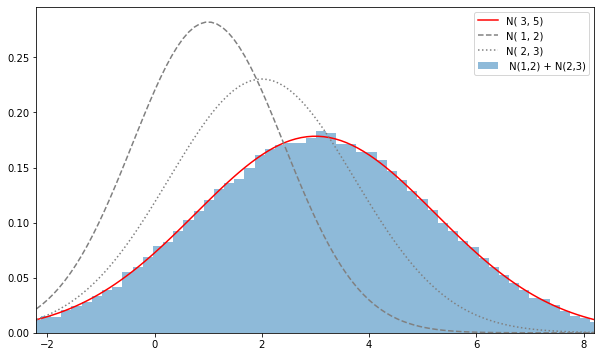

In [15]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    rv = stats.norm (3 , np.sqrt (5))
    xs = np.linspace ( rv.isf (0.99) , rv.isf (0.01), 100 )

    ax.hist ( sum_sample, bins = 100, 
              density = True, alpha = 0.5, label = ' N(1,2) + N(2,3)')
    ax.plot ( xs, rv.pdf (xs),
              label = 'N( 3, 5) ', color ='red')
    ax.plot ( xs, rv1.pdf (xs),
              label = 'N( 1, 2) ', ls= '--', color ='gray')
    ax.plot ( xs, rv2.pdf (xs),
              label = 'N( 2, 3) ', ls= ':', color ='gray')
    
    ax.legend()
    ax.set_xlim(rv.isf(0.99), rv.isf(0.01))
    plt.show()

In [16]:
#포아송분포에 대한 합의 분포

rv1 = stats.poisson (3)
rv2 = stats.poisson (4)

# 표본 크기 10만으로 무작위추출한다. 
# 두 정규분포를 더한다. 
sample_size = int (1e5)
sample1 = rv1.rvs ( sample_size)
sample2 = rv2.rvs ( sample_size)

sum_sample = sample1 + sample2

np.mean (sample1 + sample2) , np.var (sample1 + sample2)

#포아송 분포의 기댓값과 분산은 모두 lambda

(7.008, 6.999)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


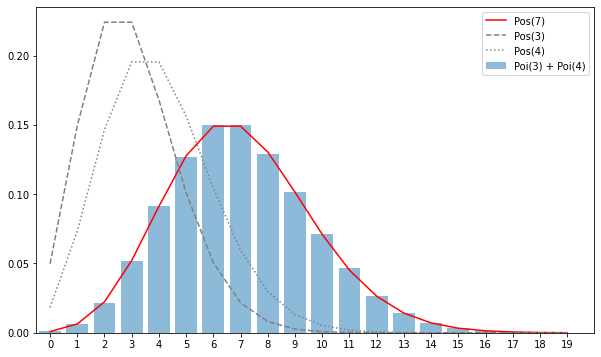

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson (7)
xs = np.arange (20)
hist, _ = np.histogram ( sum_sample, bins= 20, 
                          range = (0, 20) , normed =True )

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot ( xs, rv.pmf (xs),
          label = 'Pos(7) ', color ='red')
ax.plot ( xs, rv1.pmf (xs),
          label = 'Pos(3) ', ls= '--', color ='gray')
ax.plot ( xs, rv2.pmf (xs),
          label = 'Pos(4) ', ls= ':', color ='gray')

ax.legend()
ax.set_xlim( -0.5, 20 )
ax.set_xticks (np.arange (20))
plt.show()

In [29]:
# 베르누이분포에 대한 합의 분포

p = 0.3
rv= stats.bernoulli (p)

# 표본 크기 10만으로 무작위추출한다. 
# 두 정규분포를 더한다. 
sample_size = int(1e5)
Xs_sample = rv.rvs ( (10, sample_size))
# 괄호가 하나 빠졌을 때 분산이 0 나왔었음 Xs_sample = rv.rvs(10, sample_size)
sum_sample = np.sum ( Xs_sample, axis = 0)

np.mean (sum_sample) , np.var (sum_sample)

(3.003, 2.097)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


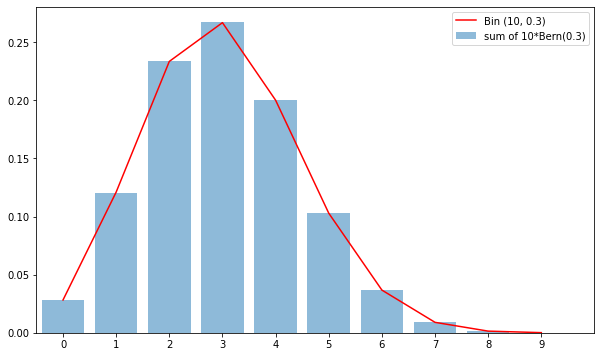

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom (10,p)
xs = np.arange (10)
hist, _ = np.histogram ( sum_sample, bins= 10, 
                          range = (0, 10) , normed =True )

#ax.bar(xs, hist, alpha=0.5, label='10개의 Bern(0.3)의 합') 한글이 네모로 표시 ㅠㅠ;;;
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot ( xs, rv.pmf (xs),
          label = 'Bin (10, 0.3) ', color ='red')
ax.legend()
ax.set_xlim( -0.5, 10 )
ax.set_xticks (np.arange (10))
plt.show()

In [ ]:
# 주변 확률 밀도 함수 
# 변수 X만의 움직임, 즉 확률변수 X의 밀도함수 => 주변 밀도함수

from functools import partial

def f_X(x):
    return integrate.quad( partial (f_xy, x) , -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad( partial (f_xy, y =y ) , -np.inf, np.inf)[0]

In [ ]:

    xs = np.linspace (x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    ax.plot ( xs, [ f(x) for x in xs],
              label = 'f(x)', color = 'gray')
    ax.plot ( xs, [ F(x) for x in xs],
              label = 'F(x)', ls= '--' , color = 'red')
    
    ax.legend()
    plt.show()

In [ ]:
#각각의 밀도함수를 그려봄


xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=( 12, 4 ))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('Xの周辺密度関数, X의 주변밀도함수')
ax2.set_title('Y_marginal density function')

plt.show()